# Moving Average Convergence Divergence (MACD)

In [41]:
# https://blog.quantinsti.com/python-trading/
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import get_prices
import yfinance as yf
%matplotlib inline

In [42]:
plt.style.use('seaborn-dark')

In [43]:
# get stock data from alphaventure using get_prices function
data = get_prices()


{'1. symbol': 'AMZN', '2. name': 'Amazon.com Inc', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '1.0000'}
Data Shape: (3290, 8)
Date Range: 2010-01-04 00:00:00  /  2023-01-27 00:00:00
All Time High: 3773.0782
All Time Low: 81.43



In [44]:
data.tail()

,Open,High,Low,Close,AdjClose,Volume,Dividend,Split
2023-01-23,97.560,97.780,95.86,97.52,97.52,76501103,0.0,1.0
2023-01-24,96.930,98.090,96.00,96.32,96.32,66929452,0.0,1.0
2023-01-25,92.560,97.240,91.52,97.18,97.18,94261570,0.0,1.0
2023-01-26,98.235,99.490,96.92,99.22,99.22,68523557,0.0,1.0
2023-01-27,99.530,103.485,99.53,102.24,102.24,87775614,0.0,1.0


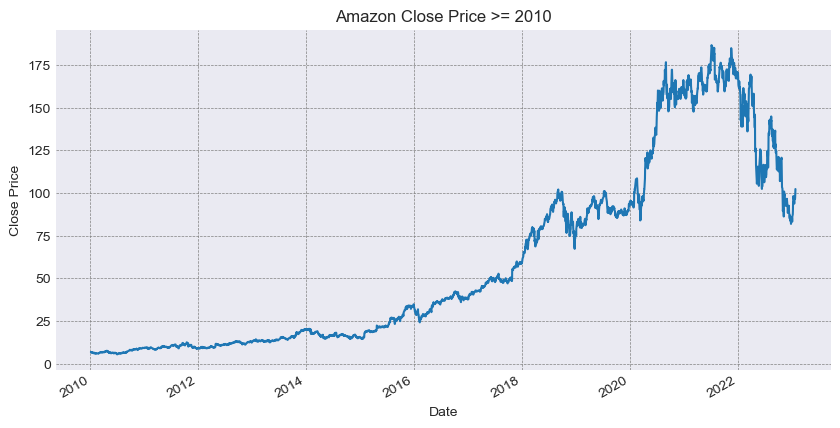

In [45]:
# plot closing prices
data.AdjClose.plot(figsize=(10,5))
plt.title('Amazon Close Price >= 2010')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

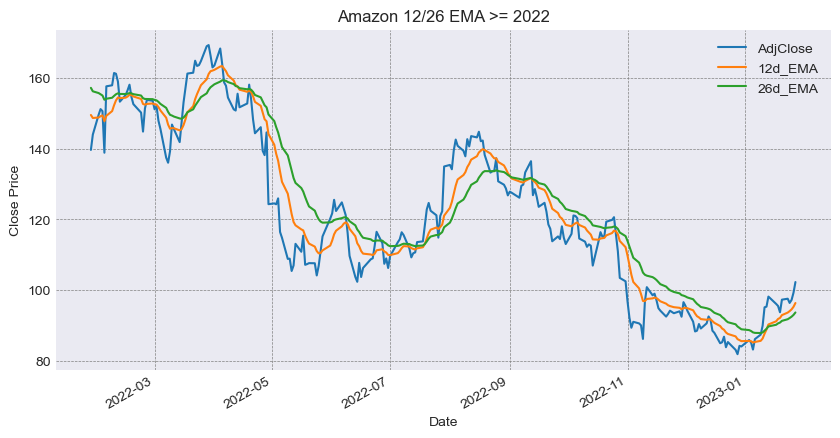

In [46]:
# calculate moving averages
data['12d_EMA'] = data.AdjClose.ewm(span=12, adjust=False).mean()
data['26d_EMA'] = data.AdjClose.ewm(span=26, adjust=False).mean()

# plot moving averages against price
data[['AdjClose', '12d_EMA', '26d_EMA']][-252:].plot(figsize=(10,5))
plt.title('Amazon 12/26 EMA >= 2022')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

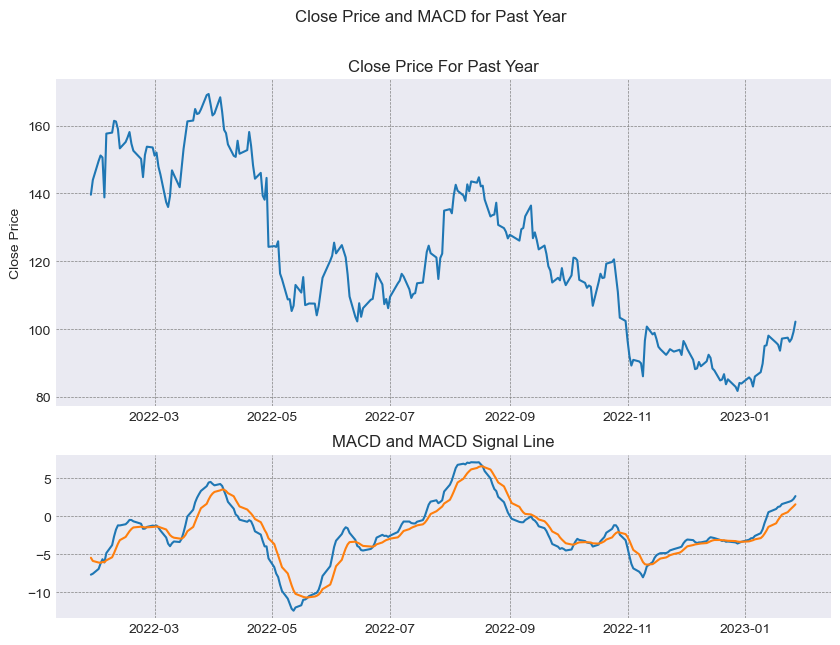

In [53]:
# calculated Macd and Signal
data['Macd'] = data['12d_EMA']- data['26d_EMA']
data['Macdsignal'] = data.Macd.ewm(span=9, adjust=False).mean()




fig, (ax1, ax2) = plt.subplots(2,figsize=(10,7),gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('Close Price and MACD for Past Year')

ax1.plot(data['AdjClose'][-252:])
ax1.set_ylabel('Close Price')
ax1.set_title('Close Price For Past Year')

ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax2.plot(data[['Macd','Macdsignal']][-252:])
ax2.set_title('MACD and MACD Signal Line')
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


plt.show()

In [54]:
data=yf.download('amzn', '2010-01-01')
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-23 00:00:00-05:00,97.559998,97.779999,95.860001,97.519997,97.519997,76501100
2023-01-24 00:00:00-05:00,96.930000,98.089996,96.000000,96.320000,96.320000,66929500
2023-01-25 00:00:00-05:00,92.559998,97.239998,91.519997,97.180000,97.180000,94261600
2023-01-26 00:00:00-05:00,98.239998,99.489998,96.919998,99.220001,99.220001,68523600
2023-01-27 00:00:00-05:00,99.529999,103.489998,99.529999,102.239998,102.239998,87678100


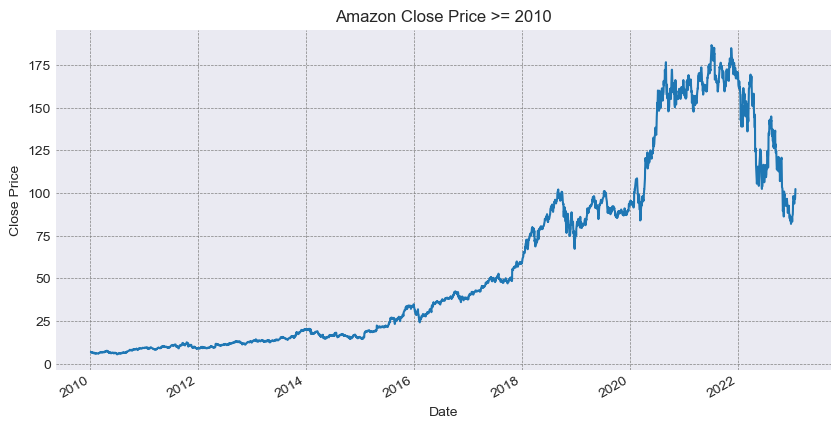

In [55]:
# plot closing prices
data.Close.plot(figsize=(10,5))
plt.title('Amazon Close Price >= 2010')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

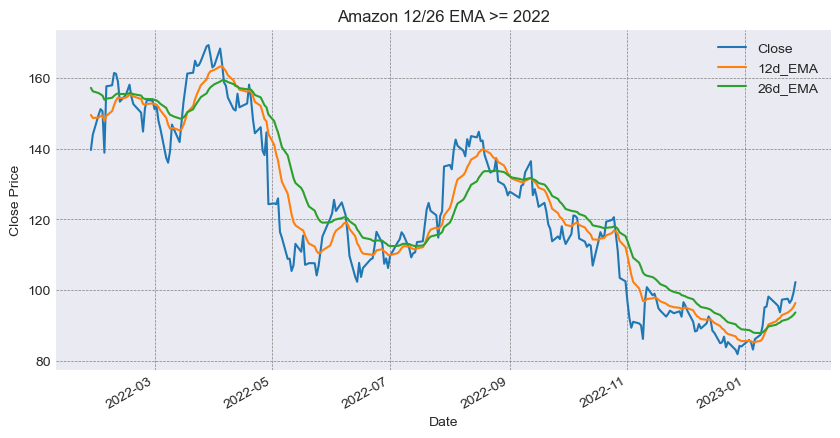

In [56]:
# calculate moving averages
data['12d_EMA'] = data.Close.ewm(span=12, adjust=False).mean()
data['26d_EMA'] = data.Close.ewm(span=26, adjust=False).mean()

# plot moving averages against price
data[['Close', '12d_EMA', '26d_EMA']][-252:].plot(figsize=(10,5))
plt.title('Amazon 12/26 EMA >= 2022')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

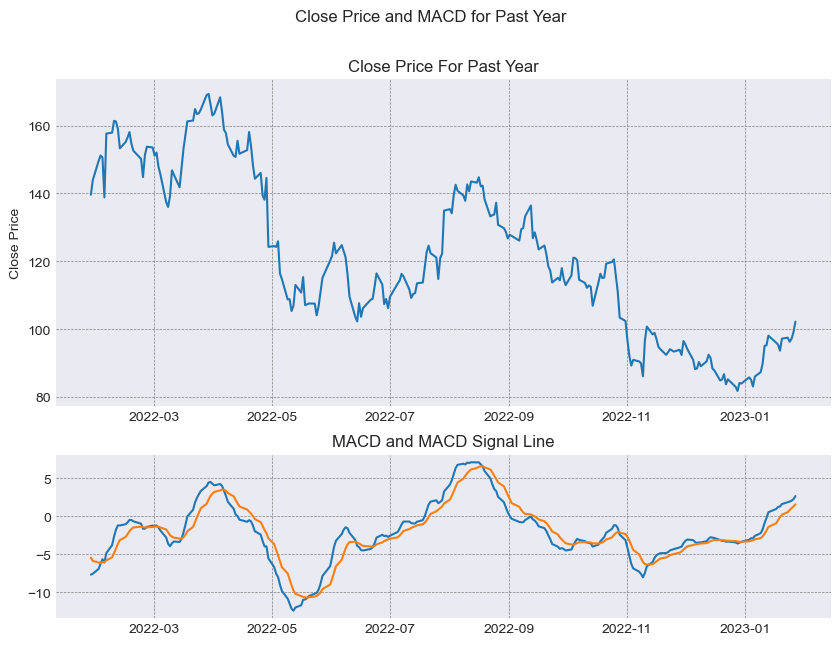

In [57]:
# calculated Macd and Signal
data['Macd'] = data['12d_EMA']- data['26d_EMA']
data['Macdsignal'] = data.Macd.ewm(span=9, adjust=False).mean()




fig, (ax1, ax2) = plt.subplots(2,figsize=(10,7),gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('Close Price and MACD for Past Year')

ax1.plot(data['Close'][-252:])
ax1.set_ylabel('Close Price')
ax1.set_title('Close Price For Past Year')

ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax2.plot(data[['Macd','Macdsignal']][-252:])
ax2.set_title('MACD and MACD Signal Line')
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


plt.show()